In [63]:
# Basic libraries
import pandas as pd
import numpy as np

# For text preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# For BERT
from transformers import BertTokenizer, TFBertForSequenceClassification, TFAlbertForSequenceClassification, AlbertTokenizer, AlbertModel, DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf

from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline


In [64]:
# Load your dataset (ensure it's in the correct format: CSV with 'text' and 'label' columns)
df = pd.read_csv('./data/final_hateXplain.csv')
print(len(df))

df =df.drop(['Miscellaneous', 'label'], axis=1)


# Check for missing values
print(df.isnull().sum())

# Basic exploration of the dataset
print(df['comment'].value_counts())
print(df.head())


20109
comment               0
Race                  0
Religion              0
Gender                0
Sexual Orientation    0
dtype: int64
comment
0 u0 lmao wow fuck you too 😂 😂                                                                                                                                                                                                                                                                 1
nigger jokes are more played out than groyper avis keep using it it has no effect meanwhile all you do is whine and bitch way to save the west bitching on gab my dude                                                                                                                         1
nigger nigger chicken dinner                                                                                                                                                                                                                                                       

In [65]:

race_mapping = {
    'No_race': 0,
    'African': 1,
    'Arab': 1,
    'Asian': 1,
    'Caucasian': 1,
    'Hispanic': 1,
    'Indian': 1,
    'Indigenous': 1
}
religion_mapping = {
    'Nonreligious': 0,
    'Buddhism': 1,
    'Christian': 1,
    'Hindu': 1,
    'Islam': 1,
    'Jewish': 1
}
gender_mapping = {
    'No_gender': 0,
    'Men': 1,
    'Women': 1
}
sexual_orientation_mapping = {
    'No_orientation': 0,
    'Asexual': 1,
    'Bisexual': 1,
    'Heterosexual': 1,
    'Homosexual': 1
}
df['Race'] = df['Race'].map(race_mapping)
df['Religion'] = df['Religion'].map(religion_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Sexual Orientation'] = df['Sexual Orientation'].map(sexual_orientation_mapping)



category_columns = ['Race','Religion','Gender','Sexual Orientation']


X_train, X_test, y_train, y_test = train_test_split(df['comment'], df[category_columns], test_size=0.2, random_state=42)

# For traditional models: use TF-IDF to convert text into feature vectors
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF Vectorizer placeholder
    ('clf', MultiOutputClassifier(MultinomialNB()))  # MultiOutput Naive Bayes classifier
])

print(df)

                                                 comment  Race  Religion  \
0                         0 u0 lmao wow fuck you too 😂 😂     0         0   
1      1 0 th floor maybe wow cnn with the fakenews t...     0         0   
2      1 0 yrs <number> white women raped by niggers ...     1         0   
3      1 2 h ago ching chong accepted your friend req...     1         0   
4      1 8 th century mayhem and lawlessness had noth...     0         0   
...                                                  ...   ...       ...   
20104  😂 😂 😂 😂 😂 y ’ all be so mad at caucasians fail...     1         0   
20105  🤔 🤔 🤔 🤔 mmm yes the trebuchet memes are much n...     1         1   
20106             🤣 this so ghetto i ’ m ready to get tf     0         0   
20107  🤣 🤣 😂 😂 🤣 🤣 😂 😂 🤣 🤣 you spelled my name wrong ...     1         0   
20108  🤨 hm six million but yep they were disarmed ce...     0         1   

       Gender  Sexual Orientation  
0           0                   0  
1           0  

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [3000, 5000, 7000, 10000, 15000, 20000],  # Limit feature space
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],   # Unigrams, bigrams, trigrams
    'tfidf__max_df': [0.7, 0.85, 0.95],               # Ignore words appearing in high % of docs
    'tfidf__min_df': [1, 2, 5],                       # Ignore words appearing in few docs
    'tfidf__sublinear_tf': [True, False],             # Logarithmic scaling
    'clf__estimator__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]        # Alpha for smoothing in MultinomialNB
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve and display best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters found:", best_params)
print("Best cross-validation accuracy:", best_score)

# Train the final model with the best parameters
best_pipeline = grid_search.best_estimator_
best_pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_pipeline.predict(X_test)
print("Test Accuracy with Best Parameters:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 3240 candidates, totalling 16200 fits
[CV] END clf__estimator__alpha=0.1, tfidf__max_df=0.7, tfidf__max_features=3000, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__sublinear_tf=False; total time=   0.3s
[CV] END clf__estimator__alpha=0.1, tfidf__max_df=0.7, tfidf__max_features=3000, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__sublinear_tf=False; total time=   0.2s
[CV] END clf__estimator__alpha=0.1, tfidf__max_df=0.7, tfidf__max_features=3000, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__sublinear_tf=True; total time=   0.3s
[CV] END clf__estimator__alpha=0.1, tfidf__max_df=0.7, tfidf__max_features=3000, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__sublinear_tf=True; total time=   0.3s
[CV] END clf__estimator__alpha=0.1, tfidf__max_df=0.7, tfidf__max_features=3000, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__sublinear_tf=True; total time=   0.3s
[CV] END clf__estimator__alpha=0.1, tfidf__max_df=0.7, tfidf__max_features=3000, t

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear')  # Linear kernel is commonly used for text classification
multi_class_svm = MultiOutputClassifier(svm_model)
multi_class_svm.fit(X_train_tfidf, y_train)

# Make predictions
svm_predictions = multi_class_svm.predict(X_test_tfidf)

# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, nb_predictions_mn))
print(classification_report(y_test, nb_predictions_mn))



Accuracy: 0.4510193933366484
              precision    recall  f1-score   support

           0       0.89      0.31      0.45      1346
           1       0.83      0.24      0.37       948
           2       0.69      0.03      0.05       762
           3       0.83      0.03      0.06       495

   micro avg       0.86      0.19      0.31      3551
   macro avg       0.81      0.15      0.23      3551
weighted avg       0.82      0.19      0.29      3551
 samples avg       0.16      0.13      0.14      3551



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

# Load dataset
df = pd.read_csv('./data/final_hateXplain.csv') 
df.drop(['Miscellaneous', 'label'], axis=1, inplace=True) 

df= df[0:10000]


In [ ]:

# Split dataset
train_df, test_df = train_test_split(df, test_size=0.1)
print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in test set: {len(test_df)}")

# Select label columns (adjust column names based on your dataset)
not_chosen_columns = ['comment']
label_columns = [col for col in df.columns if col not in not_chosen_columns]

# Prepare labels
labels_list_train = train_df[label_columns].values.tolist()
labels_list_test = test_df[label_columns].values.tolist()
labels_list_train = [[float(label) for label in labels] for labels in labels_list_train]
labels_list_test = [[float(label) for label in labels] for labels in labels_list_test]


Number of rows in training set: 9000
Number of rows in test set: 1000


In [5]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize data
train_encodings = tokenizer(train_df['comment'].tolist(), padding="max_length", truncation=True, max_length=128)
eval_encodings = tokenizer(test_df['comment'].tolist(), padding="max_length", truncation=True, max_length=128)


In [6]:
class TextClassifierDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

# Create dataset objects
train_dataset = TextClassifierDataset(train_encodings, labels_list_train)
eval_dataset = TextClassifierDataset(eval_encodings, labels_list_test)


In [7]:
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    problem_type="multi_label_classification",
    num_labels=len(label_columns)
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Kjør denne hvis du ikke vil laste inn en gammel

In [ ]:

training_arguments = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    logging_dir="./logs",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_arguments,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

trainer.train()


NameError: name 'TrainingArguments' is not defined

# Kjør denne hvis du vil laste inn en gammel modell


In [8]:
training_arguments = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    logging_dir="./logs",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_arguments,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

checkpoint = "./results/checkpoint-1125"

trainer.train(resume_from_checkpoint=checkpoint)

c:\Python310\lib\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
c:\Python310\lib\site-packages\transformers\trainer.py:3262: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for a

  0%|          | 0/1125 [00:00<?, ?it/s]

{'train_runtime': 0.0389, 'train_samples_per_second': 231252.518, 'train_steps_per_second': 28906.565, 'train_loss': 0.0, 'epoch': 1.0}


TrainOutput(global_step=1125, training_loss=0.0, metrics={'train_runtime': 0.0389, 'train_samples_per_second': 231252.518, 'train_steps_per_second': 28906.565, 'total_flos': 298062277632000.0, 'train_loss': 0.0, 'epoch': 1.0})

In [9]:
sub_texts = test_df['comment'].tolist()  
sub_encodings = tokenizer(sub_texts, padding="max_length", truncation=True, return_tensors="pt")

model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

with torch.no_grad():
    inputs = {key: val.to(device) for key, val in sub_encodings.items()}
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.sigmoid(logits).cpu().numpy()


In [61]:
import numpy as np

new_threshold = 0.75 # Adjust threshold as needed
predictions = (probabilities >= new_threshold).astype(int)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support
labels = test_df[label_columns]
labels = labels[label_columns].applymap(lambda x: 1 if x > 0 else 0)

# Calculate metrics
accuracy = accuracy_score(labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')  # 'weighted' averages by label support



print("_"*110)
no_hits_full = 0
no_hits_semi=0
for i in range(len(labels)):
    hit = False
    if (labels.iloc[i].values == predictions[i]).all():
        hit = True
        no_hits_full += 1

    for j, value in enumerate(labels.iloc[i].values):
        if value == predictions[i][j]:
            no_hits_semi += 1
            break

    print(f" | Prediction: {predictions[i]}  |  Label: {labels.iloc[i].values} Probability: {probabilities[i]} | {hit}")
    print("_"*110)
   


print("Number of full hits:", no_hits_full,"Total amount of samples:", len(labels))
print("Number of semi hits:", no_hits_semi,"Total amount of samples:", len(labels))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

______________________________________________________________________________________________________________
 | Prediction: [0 0 0 1]  |  Label: [0 0 0 1] Probability: [0.13972504 0.40874562 0.33670667 1.        ] | True
______________________________________________________________________________________________________________
 | Prediction: [0 1 0 0]  |  Label: [1 1 0 0] Probability: [0.45554757 1.         0.11105256 0.21828961] | False
______________________________________________________________________________________________________________
 | Prediction: [0 1 0 0]  |  Label: [0 1 0 0] Probability: [0.44730693 1.         0.11108625 0.20946932] | True
______________________________________________________________________________________________________________
 | Prediction: [0 1 0 0]  |  Label: [0 0 0 0] Probability: [0.45163426 1.         0.11020451 0.20144542] | False
__________________________________________________________________________________________________________

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
labels = test_df[label_columns]
labels = labels[label_columns].applymap(lambda x: 1 if x > 0 else 0)
predictions = predictions.astype(int)


# Calculate metrics
accuracy = accuracy_score(labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')  # 'weighted' averages by label support

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.5550
Precision: 0.4032
Recall: 0.6222
F1 Score: 0.4761


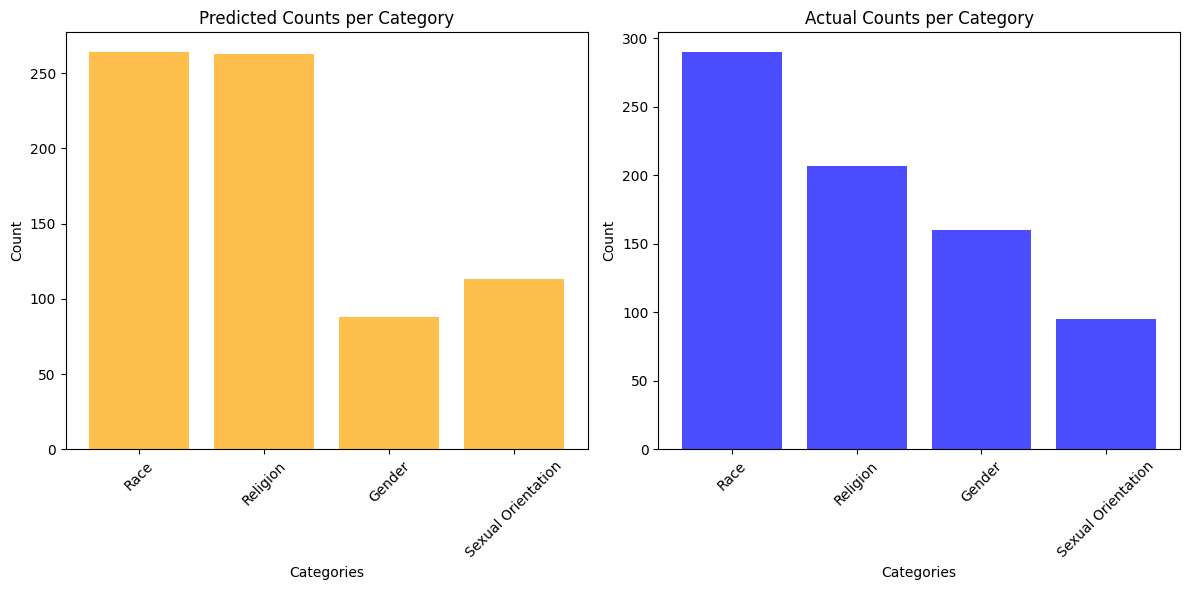

In [57]:
import matplotlib.pyplot as plt
import numpy as np


# Summing the counts for each category
predicted_counts = predictions.sum(axis=0)

label_counts = labels.sum(axis=0)
categories = ["Race","Religion","Gender","Sexual Orientation"]

# Plot predicted counts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(categories, predicted_counts, color='orange', alpha=0.7)
plt.title('Predicted Counts per Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot actual label counts
plt.subplot(1, 2, 2)
plt.bar(categories, label_counts, color='blue', alpha=0.7)
plt.title('Actual Counts per Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# GAMMELT FORSØK UNDER


In [7]:

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)

def encode_texts(texts, tokenizer, max_length=32):
    return tokenizer(
        texts.tolist(),
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='tf'
    )


# Example tokenization for input texts (assuming 'comment_text' is your text column)
encoded_inputs = encode_texts(df['comment'], tokenizer)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [9]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

# Example using MultiLabelBinarizer for multiple categories per comment
encoder = MultiLabelBinarizer()


y = {}
for category in ['Race', 'Religion', 'Gender', 'Sexual Orientation']:
    y[category] = tf.convert_to_tensor(encoder.fit_transform(df[category]), dtype=tf.float32)

In [10]:
input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask')


sequence_output = model({'input_ids': input_ids, 'attention_mask': attention_mask}).last_hidden_state
cls_token = sequence_output[:, 0, :]  # Use the [CLS] token (first token)

outputs = {}
for category, units in zip(['Race', 'Religion', 'Gender', 'Sexual Orientation'], [8, 6, 3, 5]):
    outputs[category] = tf.keras.layers.Dense(units, activation='softmax', name=category)(cls_token)

model = tf.keras.Model(
    inputs=[input_ids, attention_mask],
    outputs=list(outputs.values())
)



AttributeError: 'TFSequenceClassifierOutput' object has no attribute 'last_hidden_state'

In [54]:
# Evaluate the BERT model on the test dataset
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")



126/126 [==============================] - 836s 7s/step - loss: 0.7491 - accuracy: 0.6780
Test Accuracy: 0.6780


In [55]:
# Summary of all model performances
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions_mn))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("DistilBERT Test Accuracy:", accuracy)


Naive Bayes Accuracy: 0.6223272003978121
SVM Accuracy: 0.6412232720039781
DistilBERT Test Accuracy: 0.6780208945274353
